# 1. Puzzle
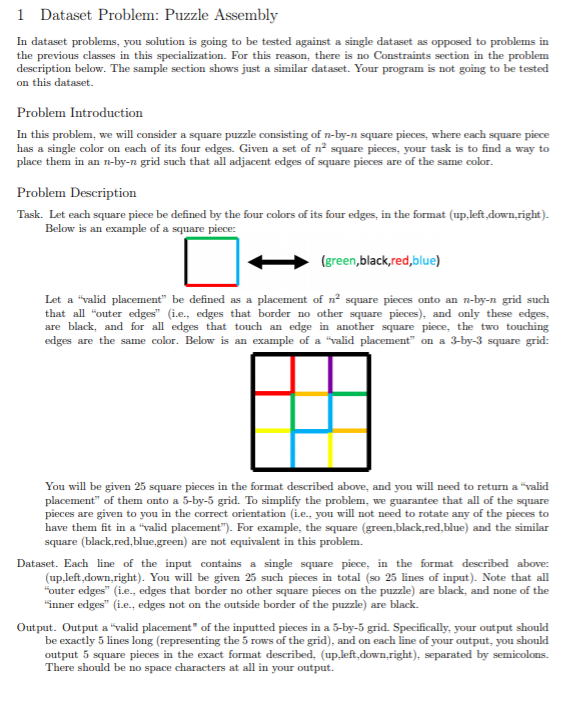

In [23]:
# python3

import sys
from math import *
from itertools import permutations
from copy import deepcopy

'''
(black,black,blue,cyan)
(black,brown,maroon,red)
(black,cyan,yellow,brown)
(black,red,green,black)
(black,red,white,red)
(blue,black,orange,yellow)
(blue,cyan,white,black)
(brown,maroon,orange,yellow)
(green,blue,blue,black)
(maroon,black,yellow,purple)
(maroon,blue,black,orange)
(maroon,orange,brown,orange)
(maroon,yellow,white,cyan)
(orange,black,maroon,cyan)
(orange,orange,black,black)
(orange,purple,maroon,cyan)
(orange,purple,purple,purple)
(purple,brown,black,blue)
(red,orange,black,orange)
(white,cyan,red,orange)
(white,orange,maroon,blue)
(white,orange,orange,black)
(yellow,black,black,brown)
(yellow,cyan,orange,maroon)
(yellow,yellow,yellow,orange)
'''

class PuzzleAssembly:
    # arriba: 0
    # izquierda: 1
    # abajo: 2
    # derecha: 3
    def __init__(self):
        n, blocks = self._input()
        #n, blocks = self._input2()
        ans = self.solve(n, blocks)
        #ans = [[0, 2, 1, 4, 3], [5, 24, 11, 20, 8], [13, 23, 7, 12, 6], [9, 16, 15, 19, 21], [22, 17, 10, 18, 14]]
        self.printResult(ans, blocks)

    def _input(self):
        #tomamos la data separada por renglones
        data = sys.stdin.read().strip().split('\n')
        # y n va a ser la cantidad de 
        n = int(sqrt(len(data)))
        blocks = []
        for d in data:
            blocks.append(d[1:-1].split(','))
        return n, blocks
    
    def _input2(self):
        #data = sys.stdin.read().strip().split('\n')
        data = '''(black,black,blue,cyan)
(black,brown,maroon,red)
(black,cyan,yellow,brown)
(black,red,green,black)
(black,red,white,red)
(blue,black,orange,yellow)
(blue,cyan,white,black)
(brown,maroon,orange,yellow)
(green,blue,blue,black)
(maroon,black,yellow,purple)
(maroon,blue,black,orange)
(maroon,orange,brown,orange)
(maroon,yellow,white,cyan)
(orange,black,maroon,cyan)
(orange,orange,black,black)
(orange,purple,maroon,cyan)
(orange,purple,purple,purple)
(purple,brown,black,blue)
(red,orange,black,orange)
(white,cyan,red,orange)
(white,orange,maroon,blue)
(white,orange,orange,black)
(yellow,black,black,brown)
(yellow,cyan,orange,maroon)
(yellow,yellow,yellow,orange)'''
        data = data.strip().split()
        n = int(sqrt(len(data)))
        blocks = []
        for d in data:
            blocks.append(d[1:-1].split(','))
        return n, blocks        

    def solve(self, n, blocks):
        ans = [[None for _ in range(n)] for __ in range(n)]
        border = [[] for _ in range(4)]
        edge = [[0 for _ in range(2)] for __ in range(4)]
        for i in range(len(blocks)):
            if 'black' == blocks[i][0]:
                if 'black' == blocks[i][1]:
                    ans[0][0] = i
                    edge[0][0] = i
                    edge[1][0] = i
                elif 'black' == blocks[i][3]:
                    ans[0][n-1] = i
                    edge[0][1] = i
                    edge[3][0] = i
                else:
                    border[0].append(i)
            elif 'black' == blocks[i][2]:
                if 'black' == blocks[i][1]:
                    ans[n-1][0] = i
                    edge[1][1] = i
                    edge[2][0] = i
                elif 'black' == blocks[i][3]:
                    ans[n-1][n-1] = i
                    edge[2][1] = i
                    edge[3][1] = i
                else:
                    border[2].append(i)
            elif 'black' == blocks[i][1]:
                border[1].append(i)
            elif 'black' == blocks[i][3]:
                border[3].append(i)
        idx = [(1, 3), (0, 2), (1, 3), (0, 2)]
        idx2 = [list(zip([0]*n, range(n))), list(zip(range(n), [0]*n)), list(zip([n-1]*n, range(n))), list(zip(range(n), [n-1]*n))]
        correctBorder = []
        for i in range(4):
            for p in permutations(border[i]):
                p = [edge[i][0]] + list(p) + [edge[i][1]]
                isCorrect = True
                for j in range(len(p)-1):
                    if blocks[p[j]][idx[i][1]] != blocks[p[j+1]][idx[i][0]]:
                        isCorrect = False
                        break
                if isCorrect:
                    #print(p)
                    for j in range(len(p)):
                        ans[idx2[i][j][0]][idx2[i][j][1]] = p[j]
        solved = set()
        for a in ans:
            for i in a:
                if None != i:
                    solved.add(i)
        unsolved = [i for i in range(len(blocks)) if not i in solved]

        _idx3 = list(zip(sum([[i]*(n-2) for i in range(1, n-1)], []), sum([list(range(1, n-1)) for _ in range(n-2)], [])))
        f = lambda x: [(x[0]-1, x[1], 2, 0), (x[0], x[1]-1, 3, 1), (x[0]+1, x[1], 0, 2), (x[0], x[1]+1, 1, 3)]
        idx3 = [f(x) for x in _idx3]
        
        for p in permutations(unsolved):
            trial = deepcopy(ans)
            for i in range(len(p)):
                trial[_idx3[i][0]][_idx3[i][1]] = p[i]
            isCorrect = True
            for i in range(len(p)):
                for j in range(4):
                    if blocks[trial[idx3[i][j][0]][idx3[i][j][1]]][idx3[i][j][2]] != blocks[p[i]][idx3[i][j][3]]:
                        isCorrect = False
                        break
                if not isCorrect:
                    break
            if isCorrect:
                ans = trial
                break
        return ans
    
    def printResult(self, ans, block):
        for i, a in enumerate(ans):
            print(';'.join(['('+','.join(block[ans[i][j]])+')' for j in range(len(ans))]))

if __name__ == "__main__":
    PuzzleAssembly()

IndexError: list index out of range

# 2. Finding Eulerian Cycle in Directed Graph

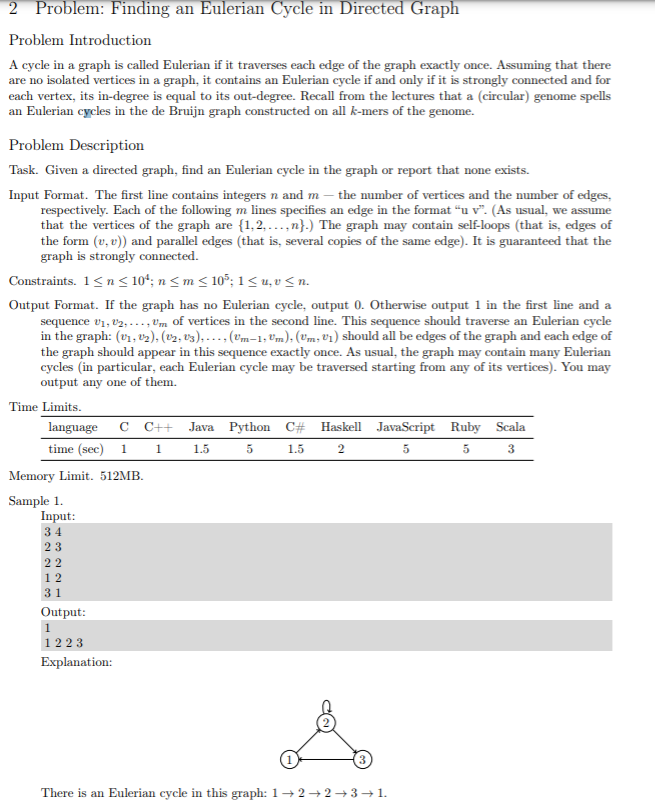

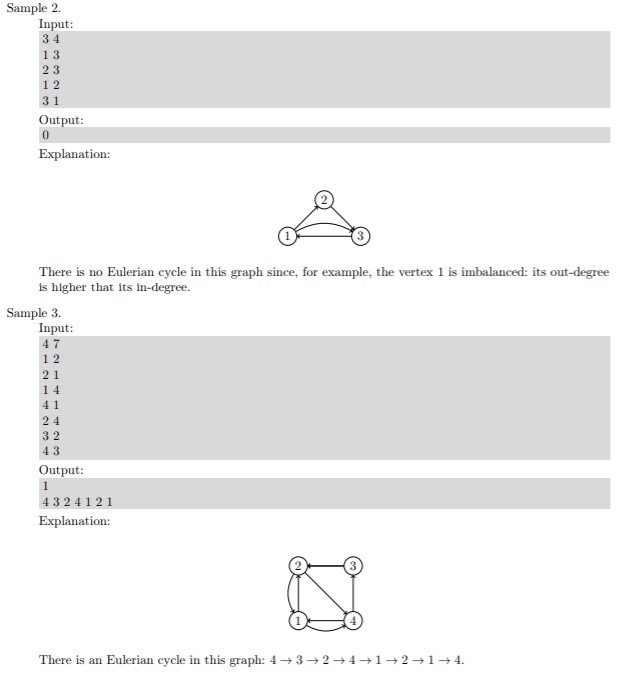

In [16]:
# python3

import sys

class EulerianCycle:
    def __init__(self):
        self.nUnEdges = 0 # number of explored edges
        self.nodesWUE = dict() # key: node with unused edges; value: the position of such node in the current path
        self.path = []
        isBalanced = self._input()
        if not isBalanced:
            print('0')
        else:
            print('1')    
            self.calculateEulerianCycle()
            self.printPath()

    def _input(self):
        data = list(sys.stdin.read().strip().split())
        self.n, self.nUnEdges = int(data[0]), int(data[1])
        self.adj = [[] for _ in range(self.n)]
        self.unusedEdges = [[] for _ in range(self.n)]
        self.outDeg = [0] * self.n
        self.inDeg = [0] * self.n
        self.adjCurPos = [0] * self.n
        for i in range(self.nUnEdges):
            curFrom = int(data[2*i+2])-1
            curTo = int(data[2*i+3])-1
            self.adj[curFrom].append(curTo)
            self.outDeg[curFrom] += 1
            self.inDeg[curTo] += 1
        for i in range(self.n):
            if self.outDeg[i] != self.inDeg[i]:
                return False
        return True
    
    def explore(self, s):
        self.path.append(s)
        curPos = self.adjCurPos[s]
        curMaxPos = self.outDeg[s]
        while curPos < curMaxPos:
            self.adjCurPos[s] = curPos + 1
            if curPos + 1 < curMaxPos:
                self.nodesWUE[s] = len(self.path) - 1
            else:
                if s in self.nodesWUE:
                    del self.nodesWUE[s]
            v = self.adj[s][curPos]
            self.path.append(v)
            s = v
            curPos = self.adjCurPos[s]
            curMaxPos = self.outDeg[s]
            self.nUnEdges -= 1
        return

    def updatePath(self, startPos):
        l = len(self.path) - 1
        self.path = self.path[startPos:l] + self.path[:startPos]
        for node, pos in self.nodesWUE.items():
            if pos < startPos:
                self.nodesWUE[node] = pos + l - startPos
            else:
                self.nodesWUE[node] = pos - startPos
        return

    def calculateEulerianCycle(self):
        self.explore(1)
        while self.nUnEdges > 0:
            node, pos = self.nodesWUE.popitem()
            self.updatePath(pos)
            self.explore(node)
        return self.path

    def printPath(self):
        #print('->'.join([str(node) for node in self.path]))
        print(' '.join([str(node+1) for node in self.path[:-1]]))       

if __name__ == "__main__":
    EulerianCycle()









IndexError: list index out of range